# MLP (MultiLayer Perceptron)

In [2]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [3]:
muon=pd.read_csv('data/muon.csv')
muon.head()

,id,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,...,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,production,signal,mass,min_ANNmuon
0,18453471,0.001578,0.999999,14.033335,0.681401,0.016039,0.451886,1.900433,1482.037476,0.066667,...,12290.760742,39264.398438,3.076006,4.003800,4.031514,458,-99,0,1866.300049,0.277559
1,5364094,0.000988,0.999705,5.536157,0.302341,0.142163,9.564503,0.865666,3050.720703,0.024022,...,16562.667969,7341.257812,3.228553,2.786543,2.975564,406,-99,0,1727.095947,0.225924
2,11130990,0.000877,0.999984,6.117302,0.276463,0.034746,1.970751,10.975849,3895.908691,0.055044,...,22695.388672,10225.309570,3.536903,2.865686,3.052810,196,-99,0,1898.588013,0.368630
3,15173787,0.000854,0.999903,5.228067,0.220739,0.076389,4.271331,3.276358,4010.781738,0.053779,...,16909.515625,9141.426758,3.087461,3.218034,2.375592,137,-99,0,1840.410034,0.246045
4,1102544,0.001129,0.999995,39.069534,1.898197,0.120936,4.984982,0.468348,4144.546875,0.004491,...,97612.804688,47118.785156,4.632295,4.711155,4.296878,477,-99,0,1899.793945,0.222060


In [4]:
X=muon.drop(columns=['id', 'production', 'signal', 'mass', 'min_ANNmuon'])
y=muon.signal

In [5]:
X_s=StandardScaler().fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test=train_test_split(X_s, y, test_size=0.2)

In [7]:
from sklearn.neural_network import MLPClassifier

In [8]:
mlp=MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', max_iter=500)
mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [9]:
y_pred=mlp.predict(X_test)
y_prob=mlp.predict_proba(X_test)

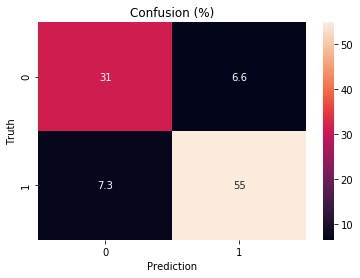

In [10]:
confusion=confusion_matrix(y_test, y_pred)
ax=sns.heatmap((confusion/len(y_pred)*100), annot=True)
b,t=ax.get_ylim()
ax.set_ylim(b+.5, t-.5)
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Confusion (%)')
plt.show();

# CNN 1D

In [11]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D

Using TensorFlow backend.


In [15]:
def secuencia(lst, steps):
    X,y=[], []
    for i in range(len(lst)):
        idx=i+steps
        
        if idx>len(lst)-1: break
        
        s_x, s_y=lst[i:idx], lst[idx]
        X.append(s_x)
        y.append(s_y)
        
    return np.array(X), np.array(y)

In [16]:
raw_seq=[10,20,30,40,50,60,70,80,90]
steps=3

In [17]:
X, y = secuencia(raw_seq, steps)
X

array([[10, 20, 30],
       [20, 30, 40],
       [30, 40, 50],
       [40, 50, 60],
       [50, 60, 70],
       [60, 70, 80]])

In [32]:
n_features=1

X=X.reshape((X.shape[0], X.shape[1], n_features))
X

array([[[10],
        [20],
        [30]],

       [[20],
        [30],
        [40]],

       [[30],
        [40],
        [50]],

       [[40],
        [50],
        [60]],

       [[50],
        [60],
        [70]],

       [[60],
        [70],
        [80]]])

In [28]:
# modelo

modelo=Sequential()

modelo.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps, n_features)))
modelo.add(MaxPooling1D(pool_size=2))
modelo.add(Flatten())
modelo.add(Dense(1))

modelo.compile(optimizer='adam', loss='mse')

In [29]:
modelo.fit(X, y, epochs=1000, verbose=0)

In [30]:
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 2, 64)             192       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [31]:
x_input=np.array([70,80,90]).reshape((1, steps, n_features))

y_hat=modelo.predict(x_input, verbose=0)
y_hat

array([[106.88779]], dtype=float32)

# CNN 2D

In [33]:
fashion=pd.read_csv('data/fashion-mnist.csv')
fashion.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


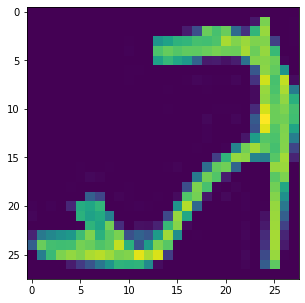

In [37]:
plt.figure(figsize=(5,5))
plt.imshow(fashion.values[8,1:].reshape(28,28))
plt.show();

In [38]:
import keras
from keras.utils import to_categorical
from keras.layers import Dropout, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [39]:
input_shape=(28, 28, 1)

In [40]:
X=np.array(fashion.iloc[:,1:])
y=to_categorical(np.array(fashion.iloc[:,0]))

In [41]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [42]:
X_train=X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test=X_test.reshape(X_test.shape[0], 28, 28, 1)

In [43]:
X_train=X_train.astype('float')/255
X_test=X_test.astype('float')/255

In [44]:
batch=256
n_clases=10
epocas=50

In [55]:
modelo=Sequential()

modelo.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Dropout(0.25))

modelo.add(Conv2D(64, (3,3), activation='relu'))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Dropout(0.25))

modelo.add(Conv2D(128, (3,3), activation='relu'))
modelo.add(Dropout(0.4))
modelo.add(Flatten())

modelo.add(Dense(128, activation='relu'))
modelo.add(Dropout(0.3))

modelo.add(Dense(n_clases, activation='softmax'))

modelo.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [56]:
modelo.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 128)        

In [58]:
historico=modelo.fit(X_train, y_train, batch_size=batch, epochs=epocas, verbose=0)

In [59]:
score=modelo.evaluate(X_test, y_test, verbose=0)

print ('Perdida (testeo)', score[0])
print ('Accuracy (testeo)', score[1])

Perdida (testeo) 0.33537407249212264
Accuracy (testeo) 0.9004999995231628


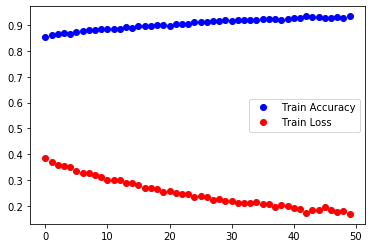

In [60]:
acc=historico.history['accuracy']
loss=historico.history['loss']
epocas=range(len(acc))

plt.plot(epocas, acc, 'bo', label='Train Accuracy')
plt.plot(epocas, loss, 'ro', label='Train Loss')
plt.legend()
plt.plot();

# LSTM (Long Short Term Memory)

In [61]:
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

from sklearn.metrics import mean_squared_error as mse

In [62]:
seq_in=np.array([.1, .2, .3, .4, .5, .6, .7, .8, .9])

n_in=len(seq_in)

seq_in=seq_in.reshape((1, n_in, 1))

In [63]:
seq_out=seq_in[:, 1:, :]
n_out=n_in-1

In [64]:
modelo=Sequential()

modelo.add(LSTM(100, activation='relu', input_shape=(n_in, 1)))
modelo.add(RepeatVector(n_out))

modelo.add(LSTM(100, activation='relu',return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))

modelo.add(LSTM(100, activation='relu',return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))

modelo.add(LSTM(100, activation='relu',return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))

modelo.add(LSTM(100, activation='relu',return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))

modelo.add(LSTM(100, activation='relu',return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))

modelo.add(LSTM(100, activation='relu',return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))

modelo.add(LSTM(100, activation='relu',return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))

modelo.compile(optimizer='adam', loss='mse')


In [65]:
modelo.fit(seq_in, seq_out, epochs=300, verbose=0)

In [66]:
modelo.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 8, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 8, 100)            80400     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 8, 1)              101       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8, 100)            40800     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 8, 1)              101       
_________________________________________________________________
lstm_4 (LSTM)                (None, 8, 100)           

In [67]:
y_hat=modelo.predict(seq_in, verbose=0)
y_hat[0,:,0]

array([0.19290605, 0.30387416, 0.39980617, 0.49917898, 0.59964454,
       0.70007527, 0.8001802 , 0.8998833 ], dtype=float32)

In [69]:
mse(seq_in[0,:,0][1:], y_hat[0,:,0])

8.277876981939187e-06